In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.tree import ExtraTreeRegressor 


In [2]:
train_data = pd.read_csv('main_dataset.csv')

In [3]:
train_data['Id'] = np.where(train_data['Id'] < 1e-18, 1e-18, train_data['Id'])
train_data['Log_Id'] = np.log10(train_data['Id'])

In [4]:
X = train_data[['Tox','Nc', 'Nd', 'Ns', 'Vds', 'Vgs']] # ignoring Nc
y = train_data['Log_Id']

poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# model = ExtraTreesRegressor(n_estimators=100, random_state=42, n_jobs = -1)
# model.fit(X_train, y_train)

In [6]:
# the above code eas execulted on google collab with TPU processor, since it is taking more than 1 hour to train the model in laptop

# importing the trained model
import joblib 
model = joblib.load('ExtraaTreesRegressor.joblib')
model.score(X_train, y_train)

0.9999685938744073

In [7]:
y_pred_1 = model.predict(X_test)
print(r2_score(y_pred_1, y_test))

0.9993052909408943


In [8]:
# note :
# 1. Ignored - column - Tsi, Nc
# the train inputs are preprocesses with polynomail features (degree = 3, include_bias = False)
# train inputs are further processed StanderScaler
# while testing the test data - first preprocess the data by removing the values less than 1e-18
# preprocess - data with poly(which was fitted on to the train) and scaler (which wass fitted on train)

# model predicts the log(Id) value

In [9]:
# testing the model on the test data set 
#  importing the testt data
test_data = pd.read_csv('test_data.csv')


In [10]:
print(test_data[test_data['Vgs'] == 2].index.tolist())

[202, 405, 608, 811, 1014]


In [11]:
test_data = test_data.iloc[0:203]
print(test_data)

     Tsi  Tox            Ns            Nc            Nd  Vds       Vgs  \
0     10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  0.000000   
1     10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  0.002000   
2     10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  0.005733   
3     10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  0.012951   
4     10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  0.022951   
..   ...  ...           ...           ...           ...  ...       ...   
198   10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  1.962951   
199   10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  1.972951   
200   10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  1.982951   
201   10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  1.992951   
202   10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  2.000000   

               Id  
0    2.330000e-18  
1    4.340000e-18  
2    1.130000e-18  
3    5.430000e-19  
4    4.5200

In [12]:
test_data['Id'] = np.where(test_data['Id'] < 1e-18, 1e-18, test_data['Id'])
test_data['Log_Id'] = np.log10(test_data['Id'])

In [13]:
X_test_1 = test_data[['Tox','Nc', 'Nd', 'Ns', 'Vds', 'Vgs']]
y_test_1 = test_data['Log_Id']

In [14]:
X_test_1_transformed = poly.transform(X_test_1)
X_test_1_scaled = scaler.transform(X_test_1_transformed)

y_pred_test_1 = model.predict(X_test_1_scaled)
print(r2_score(y_pred_test_1, y_test_1))

0.9959463204585454


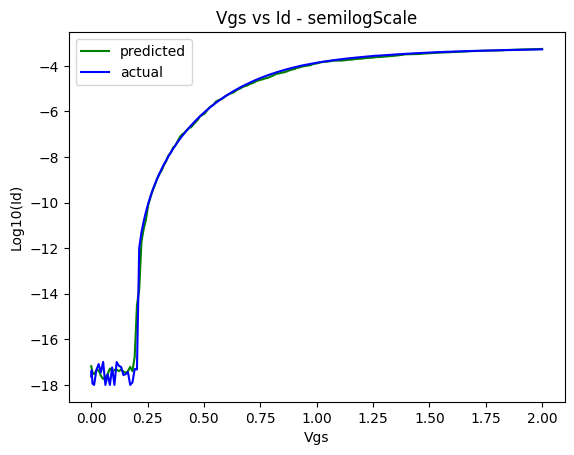

In [15]:
# plotting the data 
plt.plot(X_test_1['Vgs'], y_pred_test_1, color = "green", label = "predicted")
plt.plot(X_test_1['Vgs'], y_test_1, color = "blue" , label = "actual")
plt.title('Vgs vs Id - semilogScale')
plt.xlabel('Vgs')
plt.ylabel('Log10(Id)')
plt.legend()
plt.show()

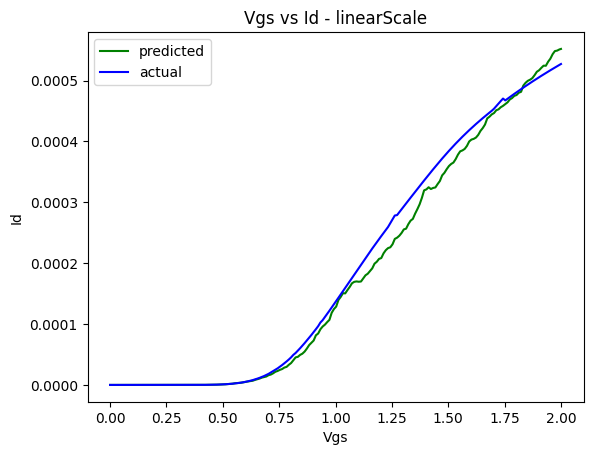

In [16]:
# plotting the data 
plt.plot(X_test_1['Vgs'], np.maximum(np.power(10, y_pred_test_1), 1e-18), color = "green", label = "predicted")
plt.plot(X_test_1['Vgs'], np.maximum(np.power(10, y_test_1), 1e-18), color = "blue", label = "actual")
plt.title('Vgs vs Id - linearScale')
plt.xlabel('Vgs')
plt.ylabel('Id')
plt.legend()
plt.show()

In [19]:
print(model.get_params())
print(model)

{'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
ExtraTreesRegressor(n_jobs=-1, random_state=42)
